# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 625


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:

# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mataura
Processing Record 2 of Set 1 | hilo
Processing Record 3 of Set 1 | venice
Processing Record 4 of Set 1 | flinders
Processing Record 5 of Set 1 | punta arenas
Processing Record 6 of Set 1 | longyearbyen
Processing Record 7 of Set 1 | nikolskoye
Processing Record 8 of Set 1 | olive branch
Processing Record 9 of Set 1 | progreso
Processing Record 10 of Set 1 | pontes e lacerda
Processing Record 11 of Set 1 | yerbogachen
Processing Record 12 of Set 1 | turayf
Processing Record 13 of Set 1 | butaritari
Processing Record 14 of Set 1 | zabol
Processing Record 15 of Set 1 | verbilki
Processing Record 16 of Set 1 | gimli
Processing Record 17 of Set 1 | ushuaia
Processing Record 18 of Set 1 | yeniseysk
Processing Record 19 of Set 1 | ketchikan
Processing Record 20 of Set 1 | sirsaganj
Processing Record 21 of Set 1 | qaanaaq
Processing Record 22 of Set 1 | rikitea
Processing Record 23 of Set 1 | sas

Processing Record 38 of Set 4 | innisfail
Processing Record 39 of Set 4 | nishihara
Processing Record 40 of Set 4 | port-gentil
Processing Record 41 of Set 4 | saint george
Processing Record 42 of Set 4 | aswan
Processing Record 43 of Set 4 | scottsburgh
City not found. Skipping...
Processing Record 44 of Set 4 | boa vista
Processing Record 45 of Set 4 | lebu
Processing Record 46 of Set 4 | rapid valley
Processing Record 47 of Set 4 | buqayq
City not found. Skipping...
Processing Record 48 of Set 4 | okhotsk
Processing Record 49 of Set 4 | bacuit
City not found. Skipping...
Processing Record 0 of Set 5 | sulurpeta
City not found. Skipping...
Processing Record 1 of Set 5 | blackwater
Processing Record 2 of Set 5 | teguldet
Processing Record 3 of Set 5 | baruun-urt
Processing Record 4 of Set 5 | sentyabrskiy
City not found. Skipping...
Processing Record 5 of Set 5 | stratonion
Processing Record 6 of Set 5 | lufilufi
Processing Record 7 of Set 5 | acapulco
Processing Record 8 of Set 5 | a

Processing Record 24 of Set 8 | vestmannaeyjar
Processing Record 25 of Set 8 | gigmoto
Processing Record 26 of Set 8 | san rafael
Processing Record 27 of Set 8 | los llanos de aridane
Processing Record 28 of Set 8 | beira
Processing Record 29 of Set 8 | dalianwan
Processing Record 30 of Set 8 | pafos
Processing Record 31 of Set 8 | bambanglipuro
Processing Record 32 of Set 8 | nevelsk
Processing Record 33 of Set 8 | normandin
Processing Record 34 of Set 8 | tateyama
Processing Record 35 of Set 8 | vila
Processing Record 36 of Set 8 | dingli
Processing Record 37 of Set 8 | sola
Processing Record 38 of Set 8 | atar
Processing Record 39 of Set 8 | caborca
Processing Record 40 of Set 8 | neuquen
Processing Record 41 of Set 8 | santo antonio do monte
Processing Record 42 of Set 8 | amapa
Processing Record 43 of Set 8 | garden city
Processing Record 44 of Set 8 | eregli
Processing Record 45 of Set 8 | isangel
Processing Record 46 of Set 8 | hofn
Processing Record 47 of Set 8 | chhatak
Proces

Processing Record 14 of Set 12 | nadym
Processing Record 15 of Set 12 | salalah
Processing Record 16 of Set 12 | mach
Processing Record 17 of Set 12 | iqaluit
Processing Record 18 of Set 12 | kaitong
Processing Record 19 of Set 12 | nenjiang
Processing Record 20 of Set 12 | sao jose da coroa grande
Processing Record 21 of Set 12 | uyemskiy
Processing Record 22 of Set 12 | husavik
Processing Record 23 of Set 12 | alihe
Processing Record 24 of Set 12 | yugorsk
Processing Record 25 of Set 12 | kunnamangalam
Processing Record 26 of Set 12 | rajapalaiyam
Processing Record 27 of Set 12 | chapais
Processing Record 28 of Set 12 | kalloni
Processing Record 29 of Set 12 | haibowan
City not found. Skipping...
Processing Record 30 of Set 12 | vila do maio
Processing Record 31 of Set 12 | tidore
City not found. Skipping...
Processing Record 32 of Set 12 | balikpapan
Processing Record 33 of Set 12 | miles city
Processing Record 34 of Set 12 | xilokastron
City not found. Skipping...
Processing Record

In [23]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.count()

City          573
Lat           573
Lng           573
Max Temp      573
Humidity      573
Cloudiness    573
Wind Speed    573
Country       573
Date          573
dtype: int64

In [24]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,mataura,-46.1927,168.8643,14.37,90,99,4.49,NZ,1675620689
1,hilo,19.7297,-155.0900,23.49,95,100,2.57,US,1675620600
2,venice,27.0998,-82.4543,27.93,76,75,4.12,US,1675620690
3,flinders,-34.5833,150.8552,20.66,80,96,1.34,AU,1675620691
4,punta arenas,-53.1500,-70.9167,12.06,43,0,15.95,CL,1675620638


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,mataura,-46.1927,168.8643,14.37,90,99,4.49,NZ,1675620689
1,hilo,19.7297,-155.0900,23.49,95,100,2.57,US,1675620600
2,venice,27.0998,-82.4543,27.93,76,75,4.12,US,1675620690
3,flinders,-34.5833,150.8552,20.66,80,96,1.34,AU,1675620691
4,punta arenas,-53.1500,-70.9167,12.06,43,0,15.95,CL,1675620638


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

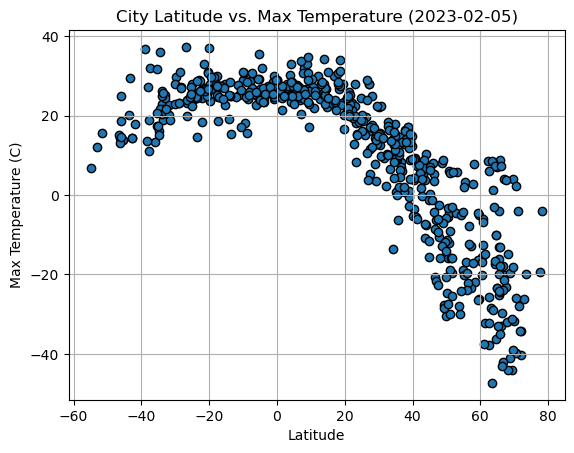

In [8]:
#today = time.strftime("%Y-%m-%d", time.gmtime())

import os.path
#last modified time of csv file
lastrun = (time.ctime(os.path.getmtime("output_data/cities.csv")))
lastrun = time.strftime("%Y-%m-%d", time.strptime(lastrun))
lastrun 


# Build scatter plot for latitude vs. temperature



plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"], marker="o", edgecolors="black")


# Incorporate the other graph properties
plt.grid(visible=True)
plt.title("City Latitude vs. Max Temperature " + ( "(" + lastrun + ")" )) 
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

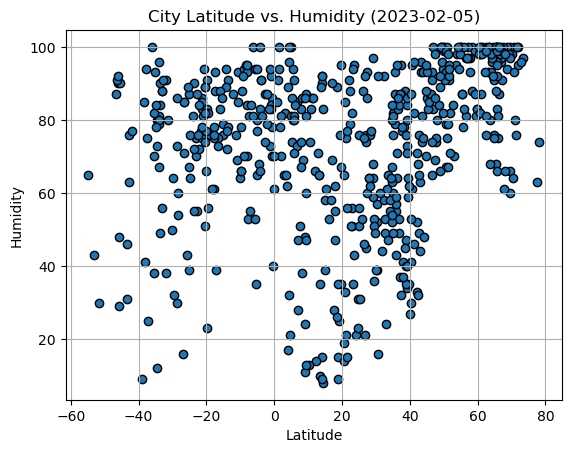

In [9]:

# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.grid(visible=True)
plt.title(f"City Latitude vs. Humidity ({lastrun})")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

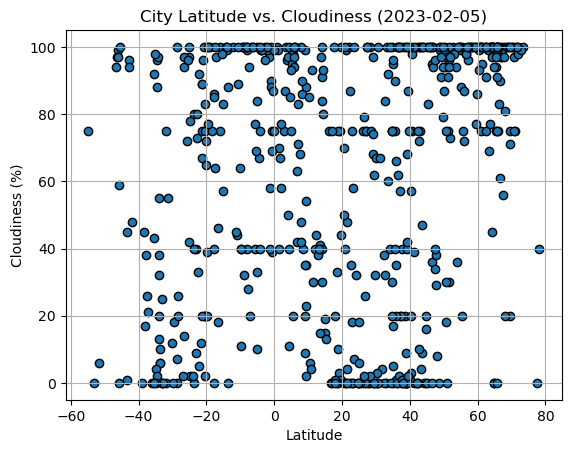

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.grid(visible=True)
plt.title("City Latitude vs. Cloudiness "+ ( "(" + lastrun + ")" ))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

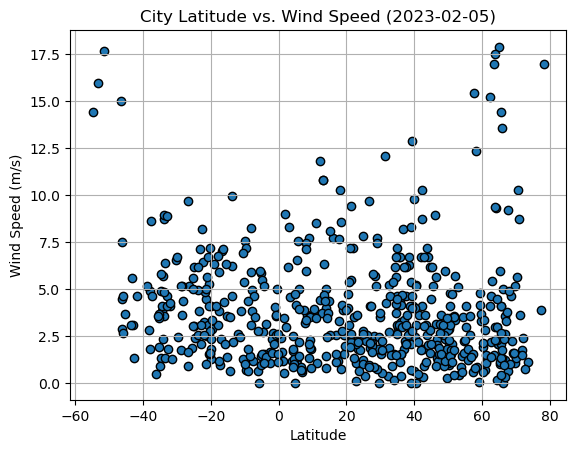

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.grid(visible=True)
plt.title("City Latitude vs. Wind Speed "+ ( "(" + lastrun + ")" ))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def LRP(chosenDf, chosenYl='', xylim=''):
    x = chosenDf['Lat']
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x,chosenDf[chosenYl])
    regress_values = x * slope + intercept
    return plt.scatter(x,chosenDf[chosenYl]), plt.plot(x,regress_values,"r-"),plt.xlabel("Latitude"), plt.ylabel(chosenYl), print(f"The r-value is: {rvalue}"), plt.annotate(f"y = {round(slope, 2)} x + {round(intercept, 2)}",(xylim),fontsize=15,color="red"), plt.show()

                


In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"]>= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,hilo,19.7297,-155.0900,23.49,95,100,2.57,US,1675620600
2,venice,27.0998,-82.4543,27.93,76,75,4.12,US,1675620690
5,longyearbyen,78.2186,15.6401,-4.09,74,40,16.98,SJ,1675620150
6,nikolskoye,59.7035,30.7861,-5.05,83,100,3.29,RU,1675620641
7,olive branch,34.9618,-89.8295,15.41,60,0,7.20,US,1675620692


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"]< 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,mataura,-46.1927,168.8643,14.37,90,99,4.49,NZ,1675620689
3,flinders,-34.5833,150.8552,20.66,80,96,1.34,AU,1675620691
4,punta arenas,-53.1500,-70.9167,12.06,43,0,15.95,CL,1675620638
9,pontes e lacerda,-15.2261,-59.3353,28.04,79,83,1.39,BR,1675620517
16,ushuaia,-54.8000,-68.3000,6.81,65,75,14.40,AR,1675620134


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8635299719886046


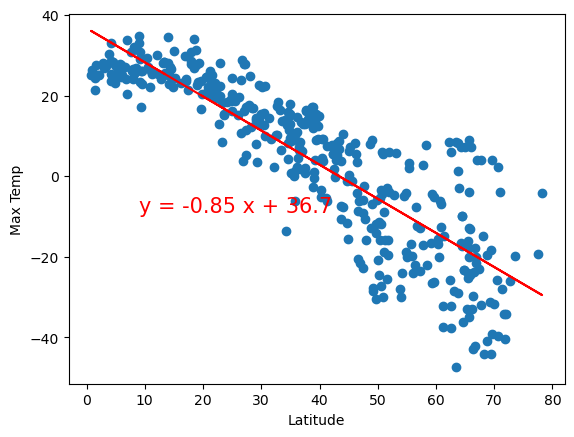

(<matplotlib.collections.PathCollection at 0x7f1fc9a61600>,
 Text(0.5, 24.0, 'Latitude'),
 Text(24.000000000000007, 0.5, 'Max Temp'),
 None,
 Text(9, -9, 'y = -0.85 x + 36.7'),
 None)

In [15]:
# Linear regression on Northern Hemisphere
LRP(northern_hemi_df, 'Max Temp', (9,-9))



The r-value is: 0.4776923407069206


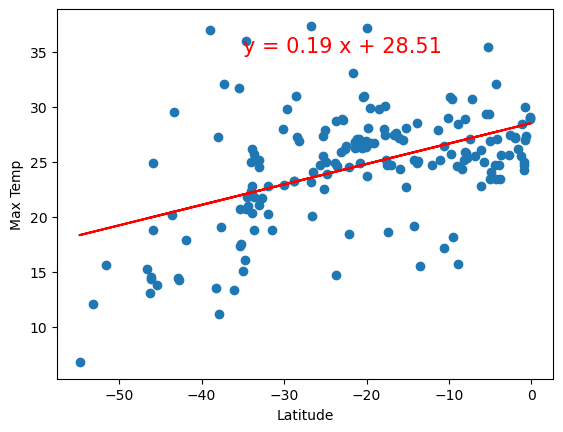

(<matplotlib.collections.PathCollection at 0x7f1fc9ae85e0>,
 Text(0.5, 24.0, 'Latitude'),
 Text(24.000000000000007, 0.5, 'Max Temp'),
 None,
 Text(-35, 35, 'y = 0.19 x + 28.51'),
 None)

In [16]:
# Linear regression on Southern Hemisphere
LRP(southern_hemi_df, 'Max Temp', (-35,35))

**Discussion about the linear relationship:** The relationship between latitude and maximum temperature seems to indicate that the farther from the equator the latitude references, then the lower the max. temperature will be. However, in the Nothern Hemisphere it seems there are few exceptions to this relation at this time of year, while there are more exceptions, hence outliers, in the Southern Hemisphere. 

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.45895795248365034


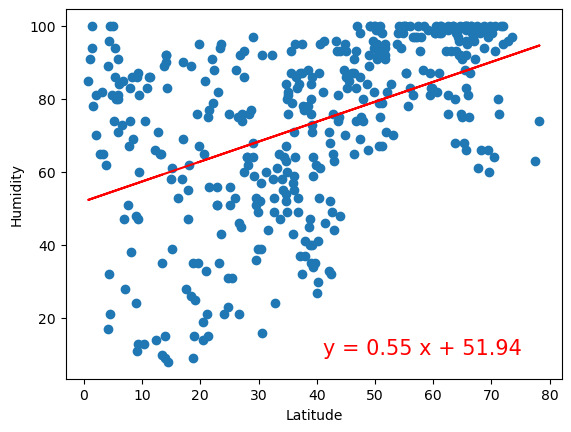

(<matplotlib.collections.PathCollection at 0x7f1fc9955c00>,
 Text(0.5, 24.0, 'Latitude'),
 Text(24.000000000000007, 0.5, 'Humidity'),
 None,
 Text(41, 10, 'y = 0.55 x + 51.94'),
 None)

In [17]:
# Northern Hemisphere
LRP(northern_hemi_df, 'Humidity', (41,10))

The r-value is: 0.2615135676416664


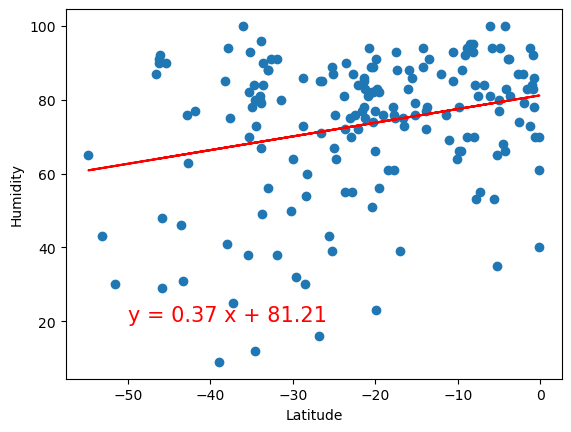

(<matplotlib.collections.PathCollection at 0x7f1fc97f44f0>,
 Text(0.5, 24.0, 'Latitude'),
 Text(24.000000000000007, 0.5, 'Humidity'),
 None,
 Text(-50, 20, 'y = 0.37 x + 81.21'),
 None)

In [18]:
# Southern Hemisphere
LRP(southern_hemi_df, 'Humidity', (-50,20))

**Discussion about the linear relationship:** There is no strong relationship between humidity and latitude in both hemispheres, though in the Northern Hemisphere there seems to be consistently clustered higher humidity in the higher latitudes starting from around 50.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.2971081782452797


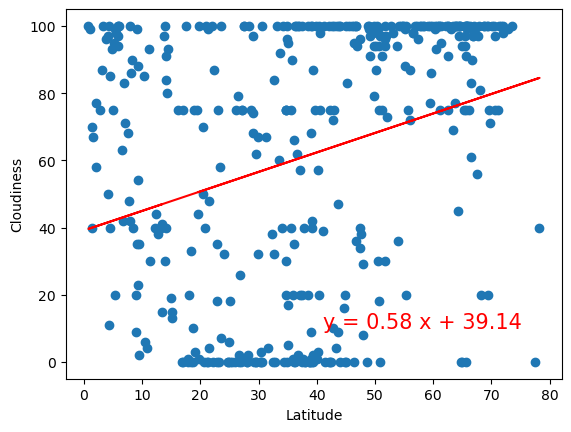

(<matplotlib.collections.PathCollection at 0x7f1fc985c850>,
 Text(0.5, 24.0, 'Latitude'),
 Text(24.000000000000007, 0.5, 'Cloudiness'),
 None,
 Text(41, 10, 'y = 0.58 x + 39.14'),
 None)

In [19]:
# Northern Hemisphere
LRP(northern_hemi_df, 'Cloudiness', (41,10))

The r-value is: 0.35463297351567014


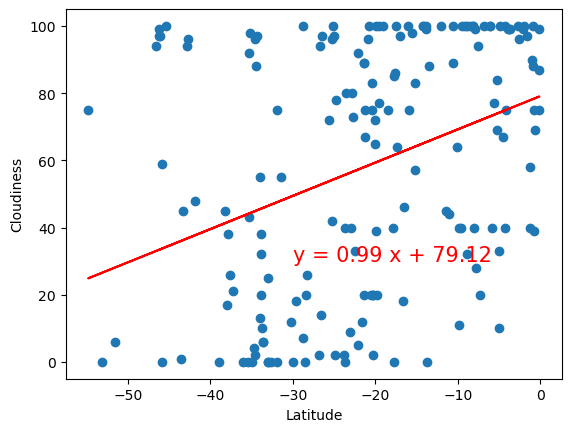

(<matplotlib.collections.PathCollection at 0x7f1fc98e4940>,
 Text(0.5, 24.0, 'Latitude'),
 Text(24.000000000000007, 0.5, 'Cloudiness'),
 None,
 Text(-30, 30, 'y = 0.99 x + 79.12'),
 None)

In [20]:
# Southern Hemisphere
LRP(southern_hemi_df, 'Cloudiness', (-30,30))

**Discussion about the linear relationship:** There seems to be no relationship between Cloudiness and Latitude in any hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.02204917617940619


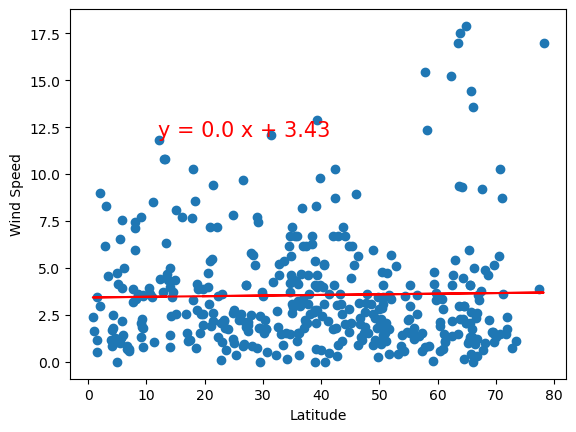

(<matplotlib.collections.PathCollection at 0x7f1fc975a620>,
 Text(0.5, 24.0, 'Latitude'),
 Text(24.000000000000007, 0.5, 'Wind Speed'),
 None,
 Text(12, 12, 'y = 0.0 x + 3.43'),
 None)

In [21]:
# Northern Hemisphere
LRP(northern_hemi_df, 'Wind Speed', (12,12))

The r-value is: -0.3748773735351552


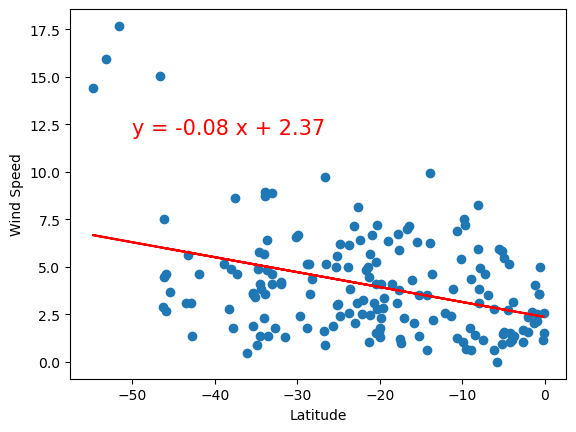

(<matplotlib.collections.PathCollection at 0x7f1fc9601240>,
 Text(0.5, 24.0, 'Latitude'),
 Text(24.000000000000007, 0.5, 'Wind Speed'),
 None,
 Text(-50, 12, 'y = -0.08 x + 2.37'),
 None)

In [22]:
# Southern Hemisphere
LRP(southern_hemi_df, 'Wind Speed', (-50,12))

**Discussion about the linear relationship:**  There seems to be no relationship between Wind Speed and Latitude in either hemisphere.